In [1799]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Dictionary

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
train_df = pd.read_csv('train_titanic.csv')
test_data = pd.read_csv('test_titanic.csv')

training_data = train_df

In [1801]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1802]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1803]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1804]:
train_df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [1805]:
train_df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

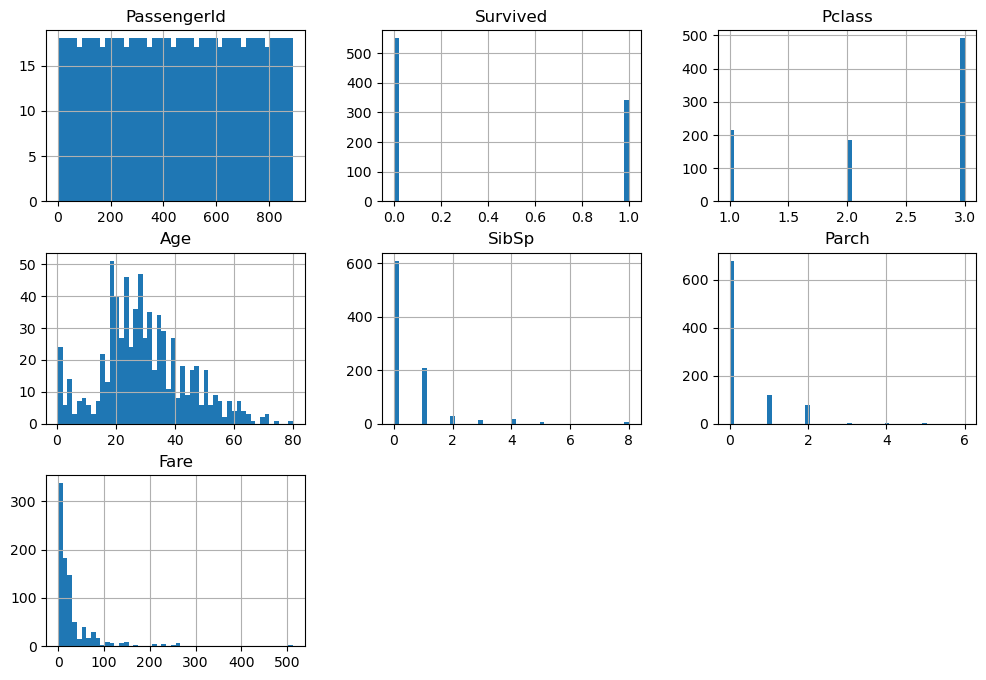

In [1806]:
train_df.hist(bins = 50,figsize=(12,8))
plt.show()

In [1807]:
train_df['age_cat'] = pd.cut(train_df['Age'],bins = [0,10,16,25,40,60,np.inf],labels=['Children','Teenagers','Young Adults','Middle-Aged','Older-Adults','Senior-citizens'])

<Axes: xlabel='age_cat'>

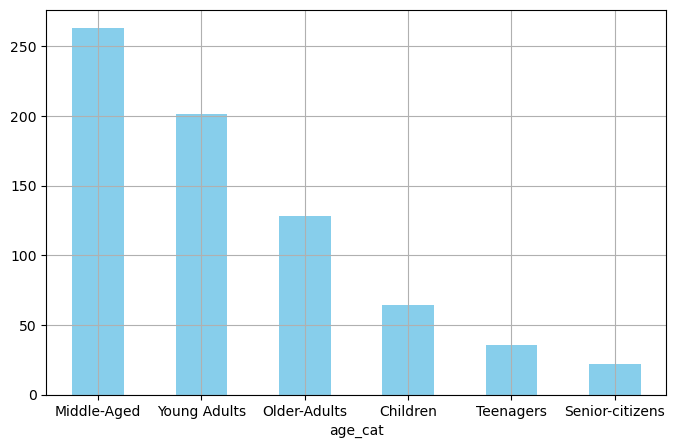

In [1913]:
train_df['age_cat'].value_counts().plot.bar(rot = 0,grid = True,figsize = (8,5),color = 'skyblue')

In [1809]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle-Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Middle-Aged
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Middle-Aged
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Middle-Aged
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adults
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Middle-Aged


In [1810]:
train_df_numeric = train_df.select_dtypes(np.number)

In [1811]:
corr = train_df_numeric.corr()
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

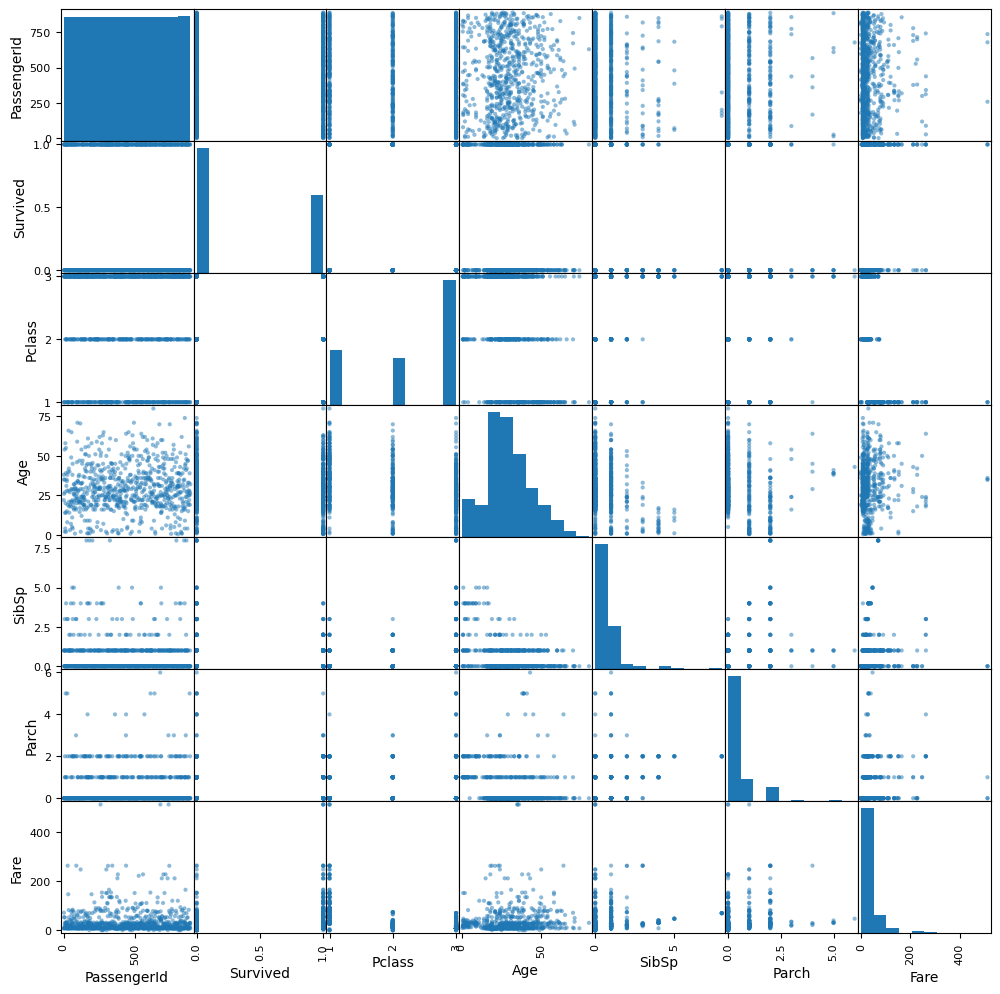

In [1812]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_df_numeric,figsize=(12,12))
plt.show()

In [1813]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle-Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Middle-Aged
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Middle-Aged
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Middle-Aged
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adults
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Middle-Aged


In [1814]:
train_df = train_df.drop(['Name','Ticket'],axis = 1)
train_df = train_df.drop('PassengerId',axis = 1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,age_cat
0,0,3,male,22.0,1,0,7.2500,NaN,S,Young Adults
1,1,1,female,38.0,1,0,71.2833,C85,C,Middle-Aged
2,1,3,female,26.0,0,0,7.9250,NaN,S,Middle-Aged
3,1,1,female,35.0,1,0,53.1000,C123,S,Middle-Aged
4,0,3,male,35.0,0,0,8.0500,NaN,S,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,Middle-Aged
887,1,1,female,19.0,0,0,30.0000,B42,S,Young Adults
888,0,3,female,NaN,1,2,23.4500,NaN,S,NaN
889,1,1,male,26.0,0,0,30.0000,C148,C,Middle-Aged


In [1815]:
train_df['Had_Sibling/Spouse?'] = train_df['SibSp'] > 0
train_df['Had_Parent/children?'] = train_df['Parch'] > 0
train_df['Had_anyone_close_onboard?'] = train_df['Had_Sibling/Spouse?'].astype(bool) | train_df['Had_Parent/children?'].astype(bool)

<Axes: ylabel='Frequency'>

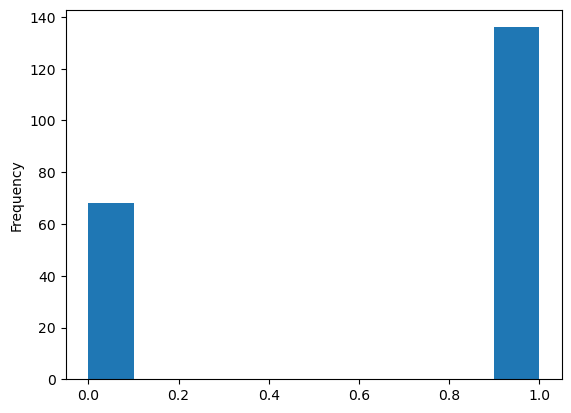

In [1816]:
train_df[train_df['Cabin'].notna()]['Survived'].plot.hist()

<Axes: ylabel='Frequency'>

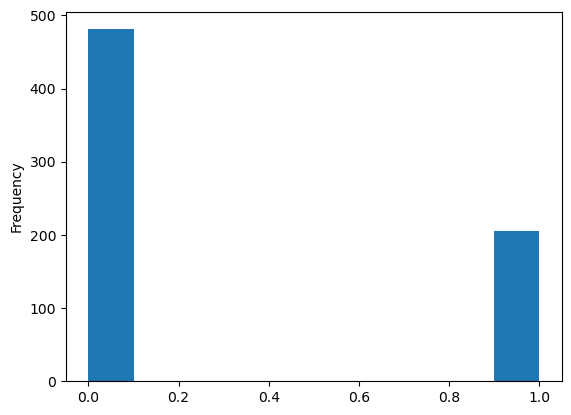

In [1817]:
train_df[train_df['Cabin'].isna()]['Survived'].plot.hist()

In [1818]:
train_df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [1819]:
train_df['has_cabin'] = train_df['Cabin'].notna().astype(bool)
train_df = train_df.drop('Cabin',axis = 1)

In [1820]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_cat,Had_Sibling/Spouse?,Had_Parent/children?,Had_anyone_close_onboard?,has_cabin
0,0,3,male,22.0,1,0,7.2500,S,Young Adults,True,False,True,False
1,1,1,female,38.0,1,0,71.2833,C,Middle-Aged,True,False,True,True
2,1,3,female,26.0,0,0,7.9250,S,Middle-Aged,False,False,False,False
3,1,1,female,35.0,1,0,53.1000,S,Middle-Aged,True,False,True,True
4,0,3,male,35.0,0,0,8.0500,S,Middle-Aged,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Middle-Aged,False,False,False,False
887,1,1,female,19.0,0,0,30.0000,S,Young Adults,False,False,False,True
888,0,3,female,NaN,1,2,23.4500,S,NaN,True,True,True,False
889,1,1,male,26.0,0,0,30.0000,C,Middle-Aged,False,False,False,True


In [1821]:
train_df['SibSp'].value_counts().sort_index()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

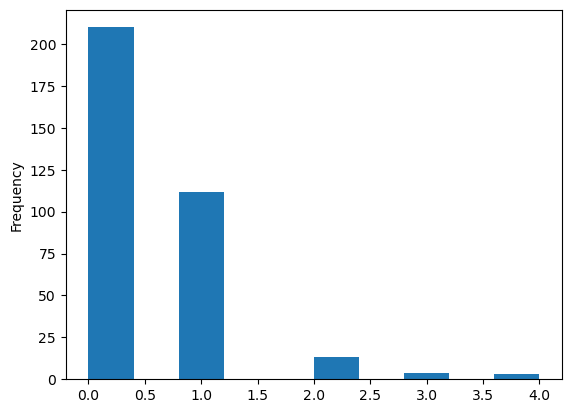

In [1822]:
train_df[train_df['Survived'] == 1]['SibSp'].plot.hist()

In [1823]:
# # Get value counts sorted by index
# sibsp_counts = train_df['SibSp'].value_counts().sort_index()
# sibsp_survived_percent = train_df[train_df['Survived'] == 1]['SibSp'].value_counts().values / train_df
# # Plot
# plt.bar(sibsp_counts.index, sibsp_counts.values)
# plt.xlabel("Number of Siblings/Spouses Aboard (SibSp)")
# plt.ylabel("Count")
# plt.title("Distribution of SibSp in Titanic Dataset")
# plt.xticks(sibsp_counts.index)  # Ensure correct x-tick labels
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

In [1824]:
train_df[train_df['Survived'] == 1]['SibSp'].value_counts().values

array([210, 112,  13,   4,   3], dtype=int64)

In [1825]:
train_df[train_df['Survived'] == 1]['SibSp'].value_counts()

SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64

In [1826]:
sibsp_counts.values

array([608, 209,  28,  16,  18,   5,   7], dtype=int64)

In [1827]:
train_df[train_df['Survived'] == 1]['SibSp'].value_counts()

SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64

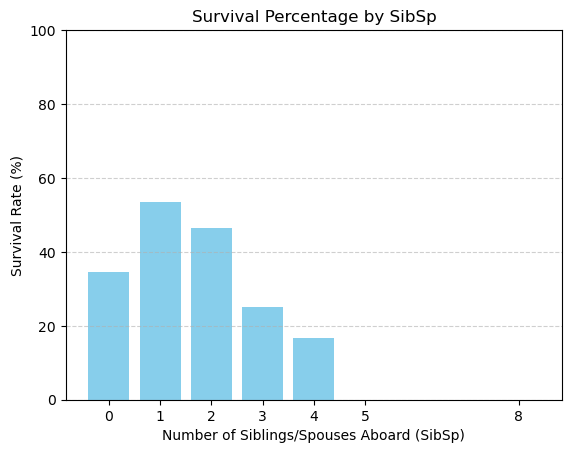

In [1916]:
# Group by SibSp and calculate mean survival rate (percentage of survivors)
survival_rate = train_df.groupby('SibSp')['Survived'].mean() * 100

# Plot
plt.bar(survival_rate.index, survival_rate.values, color='skyblue')
plt.xlabel("Number of Siblings/Spouses Aboard (SibSp)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Percentage by SibSp")
plt.xticks(survival_rate.index)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

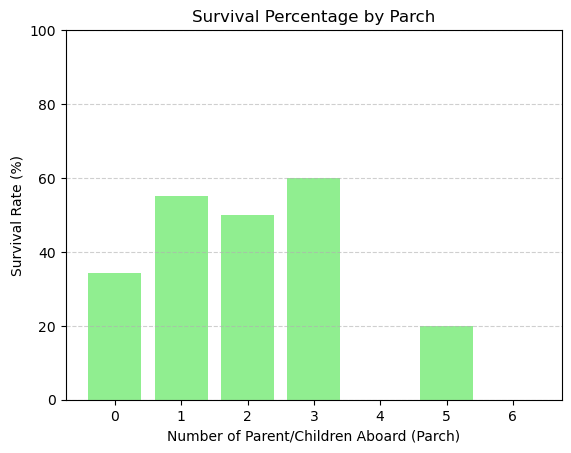

In [1829]:
survival_rate_parent_child = train_df.groupby('Parch')['Survived'].mean() * 100

plt.bar(survival_rate_parent_child.index, survival_rate_parent_child.values, color='lightgreen')
plt.xlabel("Number of Parent/Children Aboard (Parch)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Percentage by Parch")
plt.xticks(survival_rate_parent_child.index)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [1830]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_cat,Had_Sibling/Spouse?,Had_Parent/children?,Had_anyone_close_onboard?,has_cabin
0,0,3,male,22.0,1,0,7.2500,S,Young Adults,True,False,True,False
1,1,1,female,38.0,1,0,71.2833,C,Middle-Aged,True,False,True,True
2,1,3,female,26.0,0,0,7.9250,S,Middle-Aged,False,False,False,False
3,1,1,female,35.0,1,0,53.1000,S,Middle-Aged,True,False,True,True
4,0,3,male,35.0,0,0,8.0500,S,Middle-Aged,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Middle-Aged,False,False,False,False
887,1,1,female,19.0,0,0,30.0000,S,Young Adults,False,False,False,True
888,0,3,female,NaN,1,2,23.4500,S,NaN,True,True,True,False
889,1,1,male,26.0,0,0,30.0000,C,Middle-Aged,False,False,False,True


In [1831]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Survived                   891 non-null    int64   
 1   Pclass                     891 non-null    int64   
 2   Sex                        891 non-null    object  
 3   Age                        714 non-null    float64 
 4   SibSp                      891 non-null    int64   
 5   Parch                      891 non-null    int64   
 6   Fare                       891 non-null    float64 
 7   Embarked                   889 non-null    object  
 8   age_cat                    714 non-null    category
 9   Had_Sibling/Spouse?        891 non-null    bool    
 10  Had_Parent/children?       891 non-null    bool    
 11  Had_anyone_close_onboard?  891 non-null    bool    
 12  has_cabin                  891 non-null    bool    
dtypes: bool(4), category(1), float64(2)

In [1832]:
# This transformer also didn't Come of much use
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.utils.validation import check_array,check_is_fitted

class Age_classification(BaseEstimator,TransformerMixin):
    def __init__(self,bins = [0,10,16,25,40,60,np.inf],labels = ['Children','Teenagers','Young Adults','Middle-Aged','Older-Adults','Senior-citizens']):
        self.bins = bins
        self.labels = labels
    def fit(self,X,Y=None):
        self.n_features_in_ = X.shape[1] # No. Of columns
        self.feature_names_in_ = list(X.columns) if hasattr(X,'columns') else None
        self.is_fitted_ = True
        return self
    def transform(self,X):
        check_is_fitted(self)
        assert self.n_features_in_ == X.shape[1]
        assert self.feature_names_in_ == list(X.columns)
        if not isinstance(X,pd.DataFrame):
             X = pd.DataFrame(X, columns=self.feature_names_in_)
        else:
            X = X.copy() # To preserve the original X
        
        X['age_cat'] = pd.cut(X['Age'],bins = self.bins,labels = self.labels)
        return X[['age_cat']].to_numpy()


In [1833]:
# Tranformer didn't Come of much use

class Drop_Useless_columns(BaseEstimator,TransformerMixin):
    def __init__(self,columns = ['Name','Ticket','PassengerId']):
        self.columns = columns
    def fit(self,X,Y=None):
        self.n_features_in_ = X.shape[1]
        self.feature_names_in_ = list(X.columns) if hasattr(X,'columns') else None
        self.is_fitted_ = True
        return self
    def transform(self,X):
        check_is_fitted(self)
        assert self.n_features_in_ == X.shape[1]
        assert self.feature_names_in_ == list(X.columns)
        if not isinstance(X,pd.DataFrame):
             X = pd.DataFrame(X, columns=self.feature_names_in_)
        else:
            X = X.copy() # To preserve the original X

        X = X.drop(self.columns,axis = 1)
        return X.to_numpy()
        

In [1834]:

class Label_extractor(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,Y=None):
        self.n_features_in_ = X.shape[1]
        self.feature_names_in_ = list(X.columns) if hasattr(X,'columns') else None
        self.is_fitted_ = True
        return self
    def transform(self,X):
        check_is_fitted(self)
        assert self.n_features_in_ == X.shape[1]
        return X
    def get_feature_names_out(self, input_features=None):
        return ['Survived']

In [1835]:
class Add_new_columns(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,Y=None):
        self.n_features_in_ = X.shape[1]
        self.feature_names_in_ = list(X.columns) if hasattr(X,'columns') else None
        self.is_fitted_ = True
        return self
    def transform(self,X):
        check_is_fitted(self)
        assert self.n_features_in_ == X.shape[1]
        assert self.feature_names_in_ == list(X.columns)
        if not isinstance(X,pd.DataFrame):
             X = pd.DataFrame(X, columns=self.feature_names_in_)
        else:
            X = X.copy() # To preserve the original X

        X['Had_Sibling/Spouse?'] = X['SibSp'] > 0
        X['Had_Parent/children?'] = X['Parch'] > 0
        X['Had_anyone_close_onboard?'] = X['Had_Sibling/Spouse?'].astype(bool) | X['Had_Parent/children?'].astype(bool)
        X['has_cabin'] = X['Cabin'].notna().astype(bool)
        # X = X.drop('Cabin',axis = 1) # Bad Practise but Doing it
        
        return X[['Had_Sibling/Spouse?', 'Had_Parent/children?', 'Had_anyone_close_onboard?', 'has_cabin']].to_numpy()
    def get_feature_names_out(self, input_features=None):
        return [
            'Had_Sibling/Spouse?',
            'Had_Parent/children?',
            'Had_anyone_close_onboard?',
            'has_cabin'
        ]



In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder

num_pipeline_scale = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

num_pipeline_skew_scale = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('fix_skew', PowerTransformer()),  # Handles skewness
    ('scale', StandardScaler())
])

default_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'))
feature_engineer_pipeline = make_pipeline(Add_new_columns())

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [1837]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

Label_extraction = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value=0)),
    ('label_extract', Label_extractor())
])

preprocessing_train_data = ColumnTransformer([
    ('passenger_class', default_pipeline, ['Pclass', 'SibSp', 'Parch']),
    ('encode_cat', cat_pipeline, ['Sex', 'Embarked']),
    ('skew_scale', num_pipeline_skew_scale, ['Age', 'Fare']),
    ('feature_engineer', feature_engineer_pipeline, ['SibSp', 'Parch', 'Cabin']),
    ('label_pipeline', Label_extraction, ['Survived'])
], remainder='drop')

preprocessing_test_data = ColumnTransformer([
    ('passenger_class', default_pipeline, ['Pclass', 'SibSp', 'Parch']),
    ('encode_cat', cat_pipeline, ['Sex', 'Embarked']),
    ('skew_scale', num_pipeline_skew_scale, ['Age', 'Fare']),
    ('feature_engineer', feature_engineer_pipeline, ['SibSp', 'Parch', 'Cabin']),
], remainder='drop')

In [1838]:
processed_X_train = preprocessing_train_data.fit_transform(training_data)
processed_X_test = preprocessing_test_data.fit_transform(test_data)

In [1839]:
processed_X_train.shape

(891, 15)

In [1840]:
processed_X_test

c:\Users\jitik\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([[3., 0., 0., ..., 0., 0., 0.],
       [3., 1., 0., ..., 0., 1., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [3., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       [3., 1., 1., ..., 1., 1., 0.]])

In [1841]:
preprocessing_train_data.get_feature_names_out()

array(['passenger_class__Pclass', 'passenger_class__SibSp',
       'passenger_class__Parch', 'encode_cat__Sex_female',
       'encode_cat__Sex_male', 'encode_cat__Embarked_C',
       'encode_cat__Embarked_Q', 'encode_cat__Embarked_S',
       'skew_scale__Age', 'skew_scale__Fare',
       'feature_engineer__Had_Sibling/Spouse?',
       'feature_engineer__Had_Parent/children?',
       'feature_engineer__Had_anyone_close_onboard?',
       'feature_engineer__has_cabin', 'label_pipeline__Survived'],
      dtype=object)

In [1842]:
preprocessing_test_data.get_feature_names_out()

array(['passenger_class__Pclass', 'passenger_class__SibSp',
       'passenger_class__Parch', 'encode_cat__Sex_female',
       'encode_cat__Sex_male', 'encode_cat__Embarked_C',
       'encode_cat__Embarked_Q', 'encode_cat__Embarked_S',
       'skew_scale__Age', 'skew_scale__Fare',
       'feature_engineer__Had_Sibling/Spouse?',
       'feature_engineer__Had_Parent/children?',
       'feature_engineer__Had_anyone_close_onboard?',
       'feature_engineer__has_cabin'], dtype=object)

In [1843]:
X_train = processed_X_train[:, :-1] # Training Data
Y_train = processed_X_train[:, -1:].ravel() # Labels for Training Data ravel() for getting shape in 1-d to prevent warnings

X_test = processed_X_test # Test Data
Y_test = processed_X_test # Labels for Test data

In [1844]:
X_train_df = pd.DataFrame(X_train,columns = preprocessing_train_data.get_feature_names_out()[:-1])
X_train_df

,passenger_class__Pclass,passenger_class__SibSp,passenger_class__Parch,encode_cat__Sex_female,encode_cat__Sex_male,encode_cat__Embarked_C,encode_cat__Embarked_Q,encode_cat__Embarked_S,skew_scale__Age,skew_scale__Fare,feature_engineer__Had_Sibling/Spouse?,feature_engineer__Had_Parent/children?,feature_engineer__Had_anyone_close_onboard?,feature_engineer__has_cabin
0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.523388,-0.878820,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.685109,1.336651,1.0,0.0,1.0,1.0
2,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.208093,-0.790065,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.468033,1.067352,1.0,0.0,1.0,1.0
4,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.468033,-0.774439,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.130855,-0.294907,0.0,0.0,0.0,0.0
887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.767474,0.527906,0.0,0.0,0.0,1.0
888,3.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,-0.054196,0.288885,1.0,1.0,1.0,0.0
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.208093,0.527906,0.0,0.0,0.0,1.0


In [1845]:
X_test_df = pd.DataFrame(X_test,columns = preprocessing_test_data.get_feature_names_out())
X_test_df

,passenger_class__Pclass,passenger_class__SibSp,passenger_class__Parch,encode_cat__Sex_female,encode_cat__Sex_male,encode_cat__Embarked_C,encode_cat__Embarked_Q,encode_cat__Embarked_S,skew_scale__Age,skew_scale__Fare,feature_engineer__Had_Sibling/Spouse?,feature_engineer__Had_Parent/children?,feature_engineer__Had_anyone_close_onboard?,feature_engineer__has_cabin
0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.432975,-0.903049,0.0,0.0,0.0,0.0
1,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.330008,-1.042542,1.0,0.0,1.0,0.0
2,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.327412,-0.643707,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.145793,-0.778850,0.0,0.0,0.0,0.0
4,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.554798,-0.364663,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.145793,-0.868718,0.0,0.0,0.0,0.0
414,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.764354,1.611158,0.0,0.0,0.0,1.0
415,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.728046,-0.998599,0.0,0.0,0.0,0.0
416,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.145793,-0.868718,0.0,0.0,0.0,0.0


In [1846]:
Y_train_df = pd.DataFrame(Y_train,columns=['Survived'])
Y_train_df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [1917]:
from sklearn.linear_model import SGDClassifier,LogisticRegression,PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier()
log_clf = LogisticRegression()
forest_clf = RandomForestClassifier()
tree_clf = DecisionTreeClassifier()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
gbc_clf = GradientBoostingClassifier()
pagg_clf = PassiveAggressiveClassifier()

classifiers_store = []
k_fold_validation = 5 # No. Of times to validate
scoring_metric = 'f1'

for classifier in [sgd_clf,log_clf,forest_clf,tree_clf,svc_clf,knn_clf,gbc_clf,pagg_clf]:
    indi_classifier = [] # Empty List for Storing classifiers results
    classifier.fit(X_train,Y_train)
    cross_val_score_classifier = cross_val_score(classifier,X_train,Y_train,cv = k_fold_validation,scoring = scoring_metric)
    cross_val_score_classifier_mean = cross_val_score_classifier.mean()
    indi_classifier.append(classifier.__class__.__name__)
    indi_classifier.extend(cross_val_score_classifier)
    indi_classifier.append(cross_val_score_classifier_mean) # Mean of k fold Cross Validation 
    classifiers_store.append(indi_classifier) # appends to the end of list of all classifiers

classifiers_store = np.array(classifiers_store)
Model_perfomance_df = pd.DataFrame(classifiers_store,columns = ['Model_name'] + [f'{k} th fold_result' for k in range(1,k_fold_validation + 1)] + [f'{scoring_metric}-Score']).round(4)
for col in Model_perfomance_df.columns[1:]:
    Model_perfomance_df[col] = pd.to_numeric(Model_perfomance_df[col], errors='coerce') # For converting dtype to float 64

Model_perfomance_df = Model_perfomance_df.round(4)
Model_perfomance_df.sort_values(by = f'{scoring_metric}-Score',ascending=False)

,Model_name,1 th fold_result,2 th fold_result,3 th fold_result,4 th fold_result,5 th fold_result,f1-Score
6,GradientBoostingClassifier,0.7385,0.7481,0.7840,0.7059,0.8175,0.7588
4,SVC,0.7761,0.7669,0.7442,0.7009,0.8000,0.7576
5,KNeighborsClassifier,0.7259,0.7101,0.7970,0.7258,0.8000,0.7518
2,RandomForestClassifier,0.7313,0.7068,0.7941,0.6984,0.7770,0.7415
1,LogisticRegression,0.7626,0.7536,0.7007,0.7049,0.7692,0.7382
3,DecisionTreeClassifier,0.6861,0.7083,0.7704,0.6615,0.7943,0.7241
0,SGDClassifier,0.7020,0.7075,0.5800,0.7284,0.8029,0.7042
7,PassiveAggressiveClassifier,0.6957,0.7368,0.7190,0.3810,0.6723,0.6409


C:\Users\jitik\AppData\Local\Temp\ipykernel_43484\2298967350.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


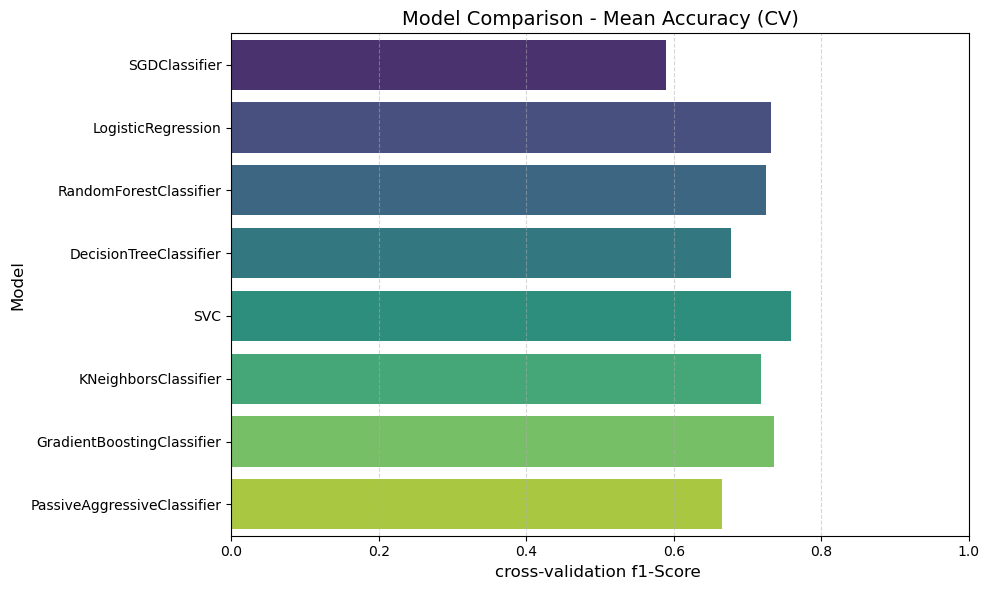

In [1848]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    y='Model_name',
    x=f'{scoring_metric}-Score',
    data=Model_perfomance_df,
    palette='viridis'
)

plt.xlabel(f'cross-validation {scoring_metric}-Score ', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model Comparison - Mean Accuracy (CV)', fontsize=14)
plt.xlim(0, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [1849]:
from sklearn.model_selection import cross_val_predict

Y_train_pred = cross_val_predict(log_clf,X_train,Y_train,cv = 3)
Y_train_forest_pred = cross_val_predict(forest_clf,X_train,Y_train,cv = 3)
Y_train_svc_pred = cross_val_predict(svc_clf,X_train,Y_train,cv = 3)
Y_train_gbc_pred = cross_val_predict(gbc_clf,X_train,Y_train,cv = 3)
Y_train_knn_clf = cross_val_predict(knn_clf,X_train,Y_train,cv = 3)

In [1850]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

confusion_matrix(Y_train,Y_train_pred)

array([[465,  84],
       [ 96, 246]], dtype=int64)

In [1851]:
precision_score(Y_train,Y_train_pred)

0.7454545454545455

In [1852]:
recall_score(Y_train,Y_train_pred)

0.7192982456140351

In [1853]:
some_data = X_train[10]
some_data

array([ 3.        ,  1.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        , -2.15948988, -0.04548834,
        1.        ,  1.        ,  1.        ,  1.        ])

In [1854]:

log_clf.decision_function([some_data])

array([2.35067512])

In [1855]:
log_clf.predict([some_data])

array([1.])

In [1856]:
Y_train_decision_scores = cross_val_predict(log_clf,X_train,Y_train,cv = 3,method = 'decision_function')
Y_train_forest_proba = cross_val_predict(forest_clf, X_train, Y_train, cv=3, method='predict_proba')
Y_train_svc_scores = cross_val_predict(svc_clf, X_train, Y_train, cv=3, method='decision_function')
Y_train_gbc_proba = cross_val_predict(gbc_clf, X_train, Y_train, cv=3, method='predict_proba')
Y_train_knn_proba = cross_val_predict(knn_clf, X_train, Y_train, cv=3, method='predict_proba')

In [1857]:
from sklearn.metrics import precision_recall_curve

precision,recall,threshold = precision_recall_curve(Y_train,Y_train_decision_scores)
forest_precision, forest_recall, forest_thresholds = precision_recall_curve(Y_train, Y_train_forest_proba[:, 1])
svc_precision, svc_recall, svc_thresholds = precision_recall_curve(Y_train, Y_train_svc_scores)
gbc_precision, gbc_recall, gbc_thresholds = precision_recall_curve(Y_train, Y_train_gbc_proba[:, 1])
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(Y_train, Y_train_knn_proba[:, 1])

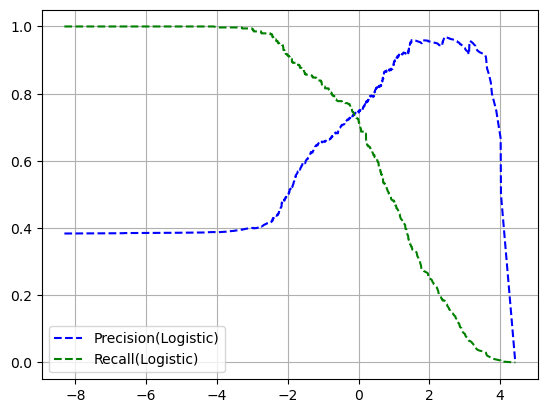

In [1858]:
plt.plot(threshold,precision[:-1],'b--',label = 'Precision(Logistic)')
plt.plot(threshold,recall[:-1],'g--',label = 'Recall(Logistic)')
plt.grid()
plt.legend()
plt.show()


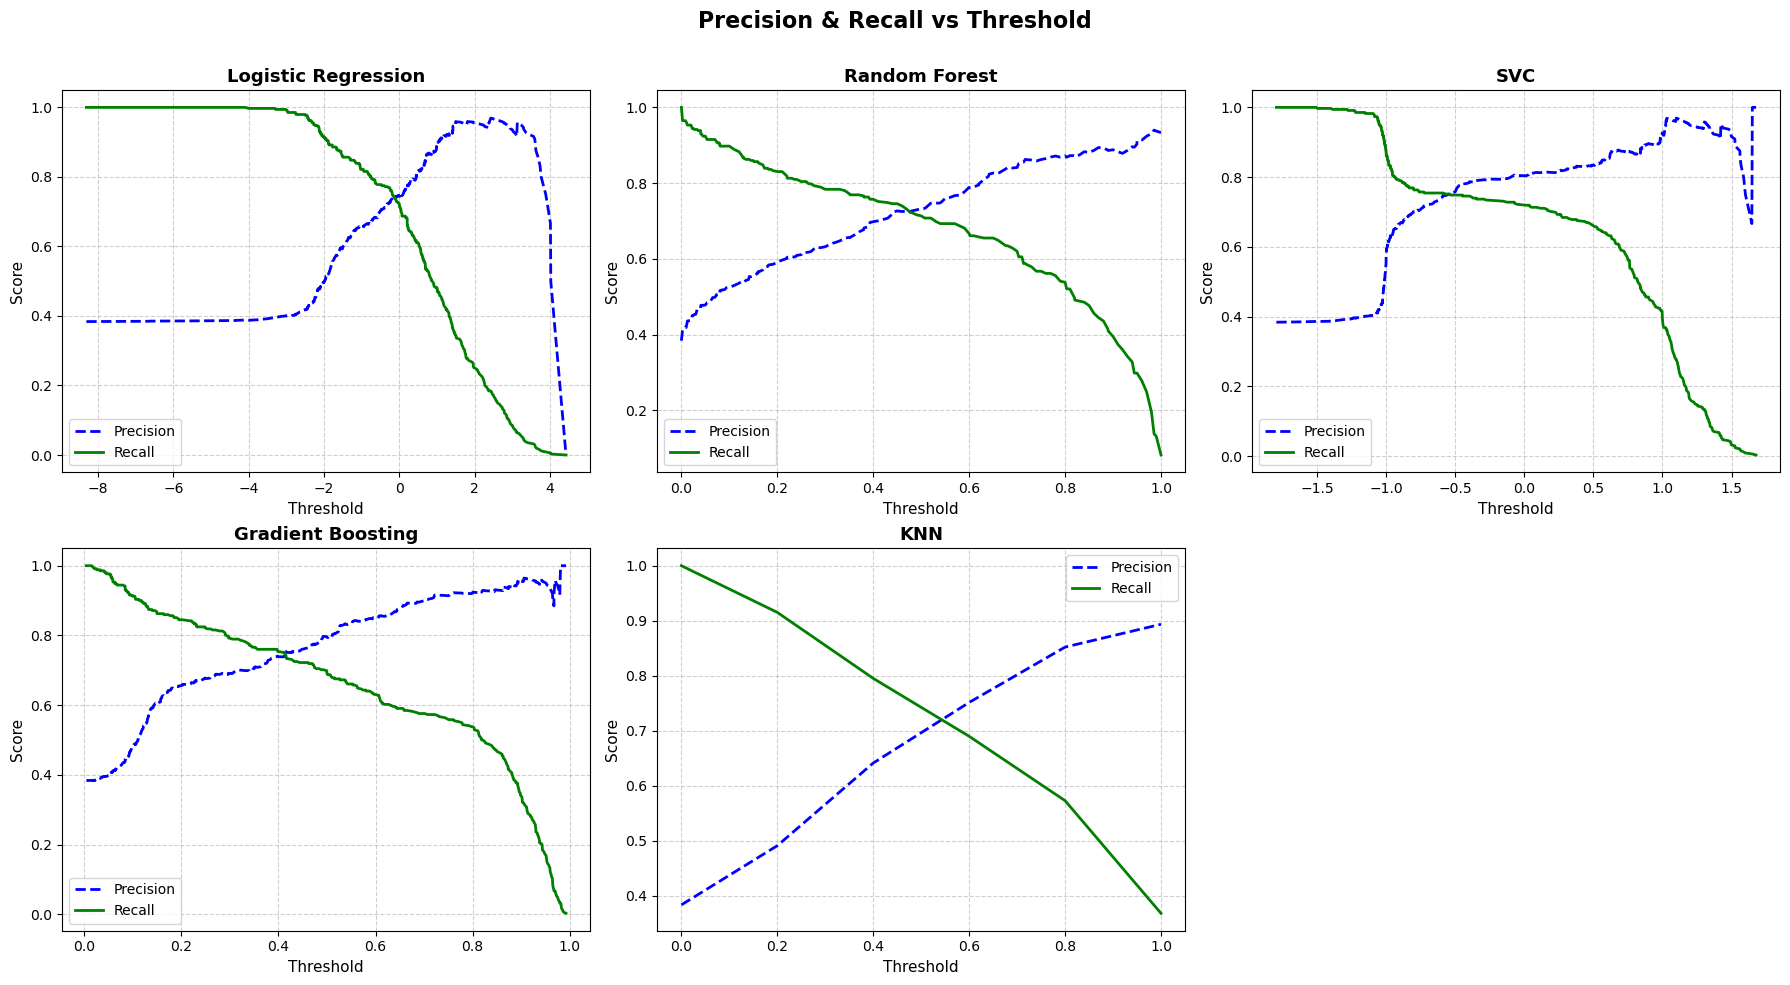

In [1859]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Logistic Regression
axes[0, 0].plot(threshold, precision[:-1], "b--", label="Precision", linewidth=2)
axes[0, 0].plot(threshold, recall[:-1], "g-", label="Recall", linewidth=2)
axes[0, 0].set_title("Logistic Regression", fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel("Threshold", fontsize=11)
axes[0, 0].set_ylabel("Score", fontsize=11)
axes[0, 0].legend(loc='best', fontsize=10)
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

# Random Forest
axes[0, 1].plot(forest_thresholds, forest_precision[:-1], "b--", linewidth=2, label="Precision")
axes[0, 1].plot(forest_thresholds, forest_recall[:-1], "g-", linewidth=2, label="Recall")
axes[0, 1].set_title("Random Forest", fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel("Threshold", fontsize=11)
axes[0, 1].set_ylabel("Score", fontsize=11)
axes[0, 1].grid(True, linestyle='--', alpha=0.6)
axes[0, 1].legend(loc='best', fontsize=10)

# SVC
axes[0, 2].plot(svc_thresholds, svc_precision[:-1], "b--", linewidth=2, label="Precision")
axes[0, 2].plot(svc_thresholds, svc_recall[:-1], "g-", linewidth=2, label="Recall")
axes[0, 2].set_title("SVC", fontsize=13, fontweight='bold')
axes[0, 2].set_xlabel("Threshold", fontsize=11)
axes[0, 2].set_ylabel("Score", fontsize=11)
axes[0, 2].grid(True, linestyle='--', alpha=0.6)
axes[0, 2].legend(loc='best', fontsize=10)

# Gradient Boosting
axes[1, 0].plot(gbc_thresholds, gbc_precision[:-1], "b--", linewidth=2, label="Precision")
axes[1, 0].plot(gbc_thresholds, gbc_recall[:-1], "g-", linewidth=2, label="Recall")
axes[1, 0].set_title("Gradient Boosting", fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel("Threshold", fontsize=11)
axes[1, 0].set_ylabel("Score", fontsize=11)
axes[1, 0].grid(True, linestyle='--', alpha=0.6)
axes[1, 0].legend(loc='best', fontsize=10)

# KNN
axes[1, 1].plot(knn_thresholds, knn_precision[:-1], "b--", linewidth=2, label="Precision")
axes[1, 1].plot(knn_thresholds, knn_recall[:-1], "g-", linewidth=2, label="Recall")
axes[1, 1].set_title("KNN", fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel("Threshold", fontsize=11)
axes[1, 1].set_ylabel("Score", fontsize=11)
axes[1, 1].grid(True, linestyle='--', alpha=0.6)
axes[1, 1].legend(loc='best', fontsize=10)

# Hide unused subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Precision & Recall vs Threshold", fontsize=16, fontweight='bold')
plt.show()



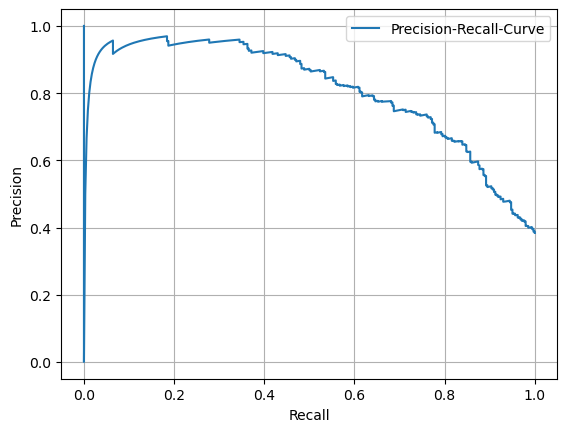

In [1860]:
plt.plot(recall,precision,label = 'Precision-Recall-Curve')
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

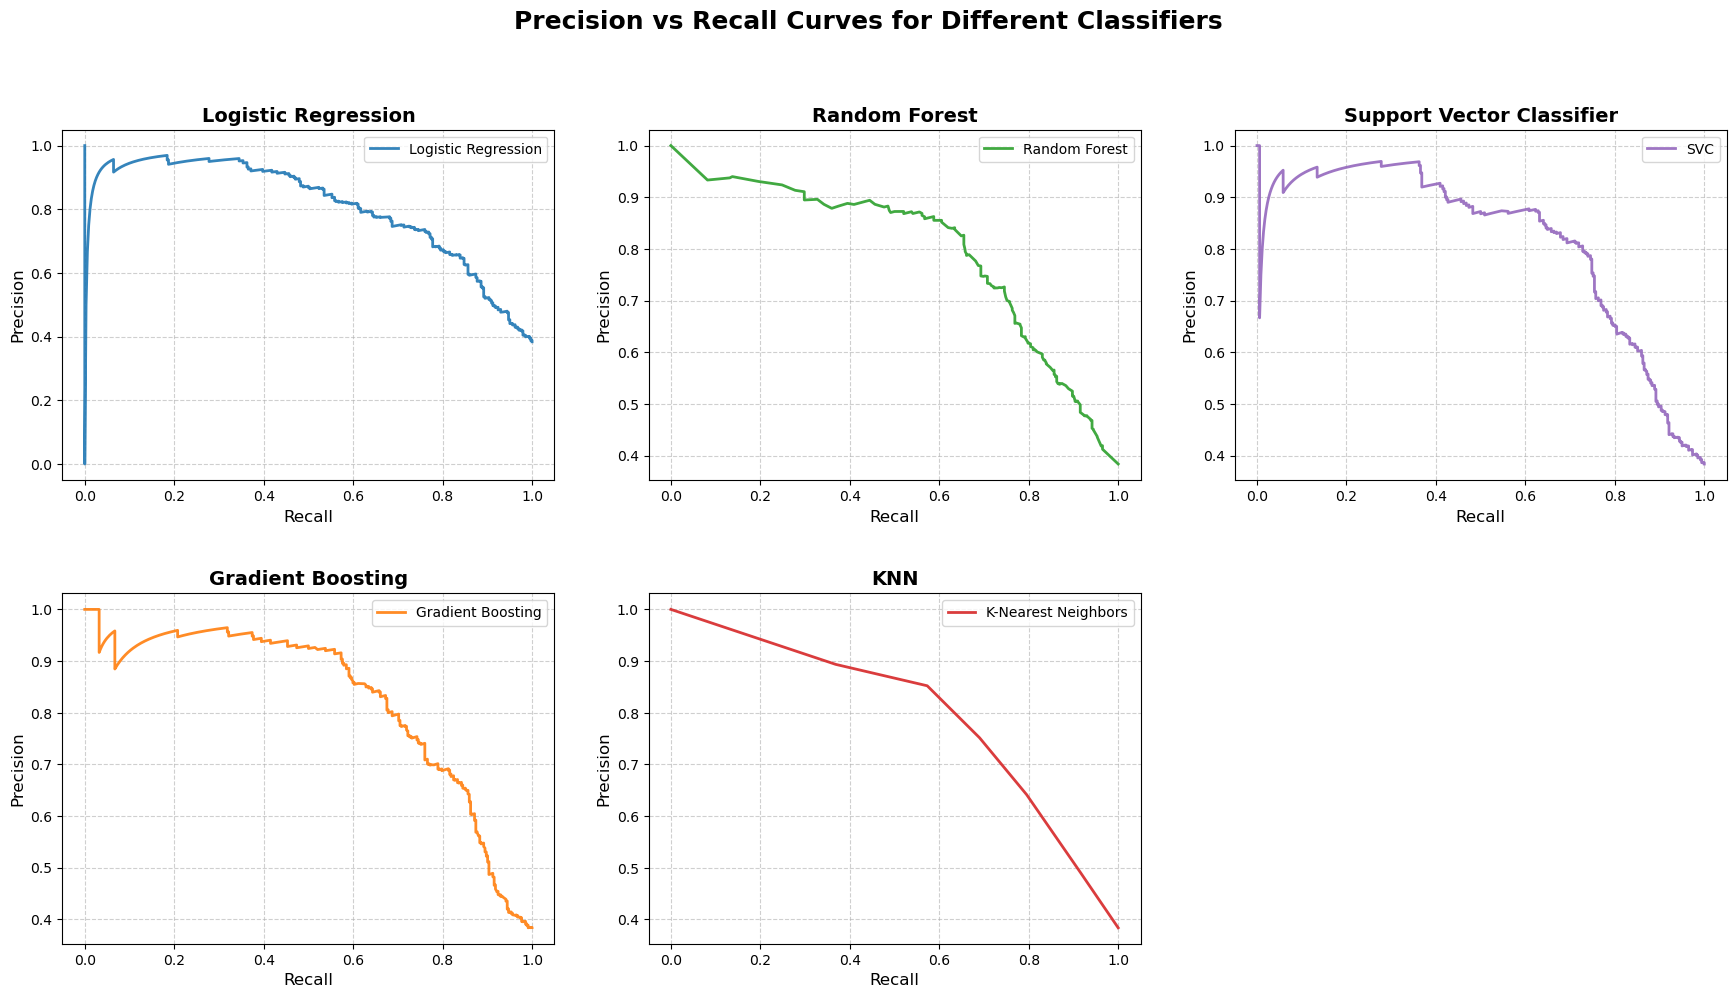

In [1861]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Precision vs Recall Curves for Different Classifiers", fontsize=18, fontweight='bold', y=1.02)

line_kwargs = {'linewidth': 2, 'alpha': 0.9}


axes[0, 0].plot(recall, precision, label='Logistic Regression', color='#1f77b4', **line_kwargs)
axes[0, 0].set_title("Logistic Regression", fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel("Recall", fontsize=12)
axes[0, 0].set_ylabel("Precision", fontsize=12)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

# --- Random Forest ---
axes[0, 1].plot(forest_recall, forest_precision, label='Random Forest', color='#2ca02c', **line_kwargs)
axes[0, 1].set_title("Random Forest", fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel("Recall", fontsize=12)
axes[0, 1].set_ylabel("Precision", fontsize=12)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, linestyle='--', alpha=0.6)


axes[0, 2].plot(svc_recall, svc_precision, label='SVC', color='#9467bd', **line_kwargs)
axes[0, 2].set_title("Support Vector Classifier", fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel("Recall", fontsize=12)
axes[0, 2].set_ylabel("Precision", fontsize=12)
axes[0, 2].legend(fontsize=10)
axes[0, 2].grid(True, linestyle='--', alpha=0.6)


axes[1, 0].plot(gbc_recall, gbc_precision, label='Gradient Boosting', color='#ff7f0e', **line_kwargs)
axes[1, 0].set_title("Gradient Boosting", fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel("Recall", fontsize=12)
axes[1, 0].set_ylabel("Precision", fontsize=12)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, linestyle='--', alpha=0.6)


axes[1, 1].plot(knn_recall, knn_precision, label='K-Nearest Neighbors', color='#d62728', **line_kwargs)
axes[1, 1].set_title("KNN", fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel("Recall", fontsize=12)
axes[1, 1].set_ylabel("Precision", fontsize=12)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, linestyle='--', alpha=0.6)

# Hide unused plot
axes[1, 2].axis('off')

# Final layout tweaks
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.90)
plt.show()



In [1862]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(Y_train,Y_train_decision_scores)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train, Y_train_forest_proba[:, 1])
fpr_svc, tpr_svc, thresholds_svc = roc_curve(Y_train, Y_train_svc_scores)
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(Y_train, Y_train_gbc_proba[:, 1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_train, Y_train_knn_proba[:, 1])

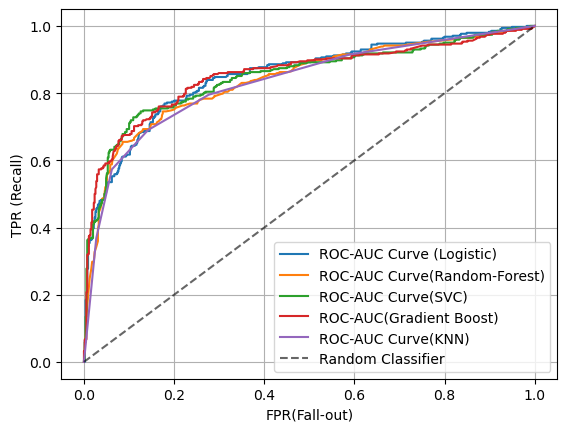

In [1918]:
plt.plot(fpr,tpr,label = 'ROC-AUC Curve (Logistic)')
plt.plot(fpr_forest,tpr_forest,label = 'ROC-AUC Curve(Random-Forest)')
plt.plot(fpr_svc,tpr_svc,label = 'ROC-AUC Curve(SVC)')
plt.plot(fpr_gbc,tpr_gbc,label = 'ROC-AUC(Gradient Boost)')
plt.plot(fpr_knn,tpr_knn,label = 'ROC-AUC Curve(KNN)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.6)
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR (Recall)')
plt.grid()
plt.legend()
plt.show()

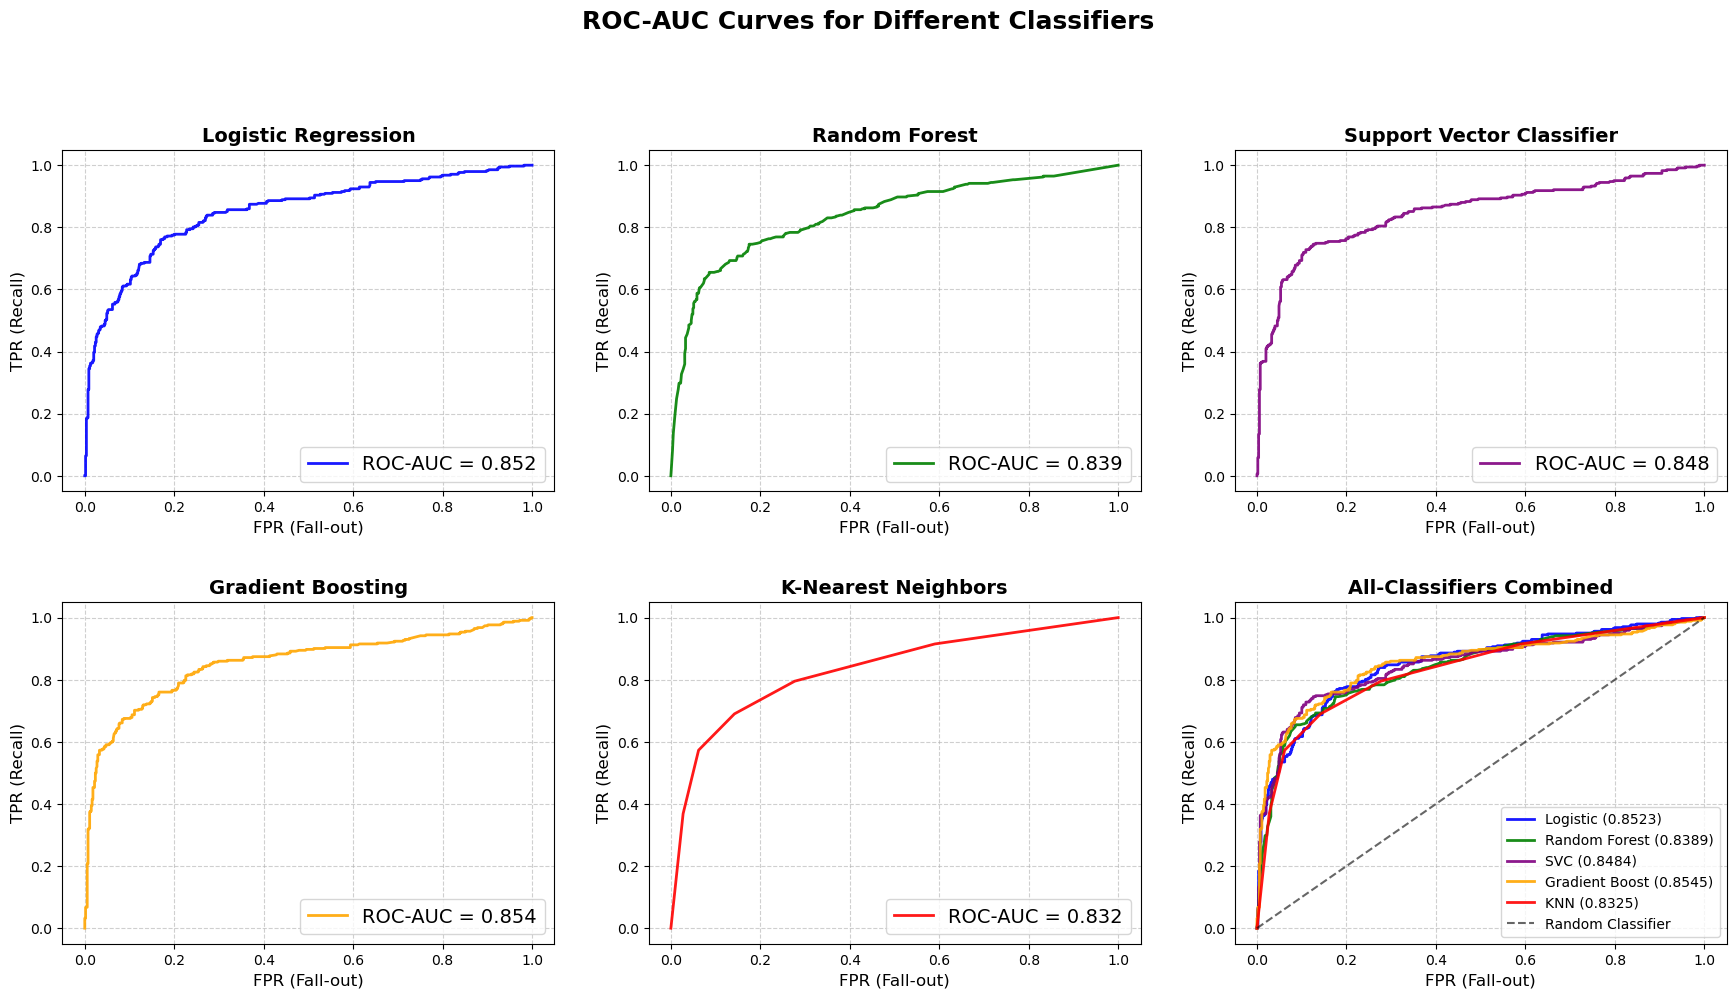

In [1864]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

auc_log = roc_auc_score(Y_train,Y_train_decision_scores)
auc_forest = roc_auc_score(Y_train, Y_train_forest_proba[:, 1])
auc_svc = roc_auc_score(Y_train, Y_train_svc_scores)
auc_gbc = roc_auc_score(Y_train, Y_train_gbc_proba[:, 1])
auc_knn = roc_auc_score(Y_train, Y_train_knn_proba[:, 1])

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("ROC-AUC Curves for Different Classifiers", fontsize=18, fontweight='bold', y=1.02)

line_kwargs = {'linewidth': 2, 'alpha': 0.9}

axes[0, 0].plot(fpr, tpr, label=f'ROC-AUC = {auc_log:.3f}', color='blue', **line_kwargs)
axes[0, 0].set_title("Logistic Regression", fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel("FPR (Fall-out)", fontsize=12)
axes[0, 0].set_ylabel("TPR (Recall)", fontsize=12)
axes[0, 0].legend(fontsize=14,loc = 'lower right')
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

axes[0, 1].plot(fpr_forest, tpr_forest, label=f'ROC-AUC = {auc_forest:.3f}', color='green', **line_kwargs)
axes[0, 1].set_title("Random Forest", fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel("FPR (Fall-out)", fontsize=12)
axes[0, 1].set_ylabel("TPR (Recall)", fontsize=12)
axes[0, 1].legend(fontsize=14,loc = 'lower right')
axes[0, 1].grid(True, linestyle='--', alpha=0.6)

axes[0, 2].plot(fpr_svc, tpr_svc, label=f'ROC-AUC = {auc_svc:.3f}', color='purple', **line_kwargs)
axes[0, 2].set_title("Support Vector Classifier", fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel("FPR (Fall-out)", fontsize=12)
axes[0, 2].set_ylabel("TPR (Recall)", fontsize=12)
axes[0, 2].legend(fontsize=14,loc = 'lower right')
axes[0, 2].grid(True, linestyle='--', alpha=0.6)

axes[1, 0].plot(fpr_gbc, tpr_gbc, label=f'ROC-AUC = {auc_gbc:.3f}', color='orange', **line_kwargs)
axes[1, 0].set_title("Gradient Boosting", fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel("FPR (Fall-out)", fontsize=12)
axes[1, 0].set_ylabel("TPR (Recall)", fontsize=12)
axes[1, 0].legend(fontsize=14,loc = 'lower right')
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

axes[1, 1].plot(fpr_knn, tpr_knn, label=f'ROC-AUC = {auc_knn:.3f}', color='red', **line_kwargs)
axes[1, 1].set_title("K-Nearest Neighbors", fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel("FPR (Fall-out)", fontsize=12)
axes[1, 1].set_ylabel("TPR (Recall)", fontsize=12)
axes[1, 1].legend(fontsize=14,loc = 'lower right')
axes[1, 1].grid(True, linestyle='--', alpha=0.6)

axes[1, 2].plot(fpr, tpr, label=f'Logistic ({auc_log:.4f})', color='blue', **line_kwargs)
axes[1, 2].plot(fpr_forest, tpr_forest, label=f'Random Forest ({auc_forest:.4f})', color='green', **line_kwargs)
axes[1, 2].plot(fpr_svc, tpr_svc, label=f'SVC ({auc_svc:.4f})', color='purple', **line_kwargs)
axes[1, 2].plot(fpr_gbc, tpr_gbc, label=f'Gradient Boost ({auc_gbc:.4f})', color='orange', **line_kwargs)
axes[1, 2].plot(fpr_knn, tpr_knn, label=f'KNN ({auc_knn:.4f})', color='red', **line_kwargs)
axes[1, 2].plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.6)

axes[1, 2].set_title("All-Classifiers Combined", fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel("FPR (Fall-out)", fontsize=12)
axes[1, 2].set_ylabel("TPR (Recall)", fontsize=12)
axes[1, 2].legend(fontsize=10, loc='lower right')
axes[1, 2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.88)
plt.show()


In [1865]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train,Y_train_gbc_proba[:,1])

0.8544962132106222

In [1866]:
log_clf.coef_

array([[-0.69568958, -0.74078048, -0.40233646,  1.30185958, -1.30516183,
         0.0619055 ,  0.14842043, -0.21362817, -0.51939451,  0.2658919 ,
         0.71795781,  0.59065496, -0.00806904,  0.58008996]])

In [1867]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_clf = LogisticRegression(solver='liblinear')

log_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200]
}

grid = GridSearchCV(log_clf, log_params, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, Y_train)
print("Best Logistic Params:", grid.best_params_)
print('Best Score ',grid.best_score_)


Best Logistic Params: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Best Score  0.8586682725089891


In [1897]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest_params = {
    'n_estimators': [100,125,150,200,300,400],
    'max_depth': [None, 5,7,8,10, 15,20,30],
}

forest_grid = GridSearchCV(forest_clf, forest_params, cv=5, scoring='roc_auc', n_jobs=-1)
forest_grid.fit(X_train, Y_train)
print("Best Random Forest Params:", forest_grid.best_params_)
print('Best Score ',forest_grid.best_score_)


Best Random Forest Params: {'max_depth': 8, 'n_estimators': 125}
Best Score  0.8681716345747061


In [1888]:
from sklearn.svm import SVC

svc_clf = SVC(probability=True)

svc_params = {
    'C': [0.01,0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 0.01, 0.1]
}

svc_grid = GridSearchCV(svc_clf, svc_params, cv=5, scoring='roc_auc', n_jobs=-1)
svc_grid.fit(X_train, Y_train)
print("Best SVC Params:", svc_grid.best_params_)
print('Best Score ',svc_grid.best_score_)


Best SVC Params: {'kernel': 'rbf'}
Best Score  0.8555514523683062


In [1882]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier()

gbc_params = {
    'n_estimators': [100, 200,300,400,500,600,700,800,900,1000],
}

gbc_grid = GridSearchCV(gbc_clf, gbc_params, cv=5, scoring='roc_auc', n_jobs=-1)
gbc_grid.fit(X_train, Y_train)
print("Best GBC Params:", gbc_grid.best_params_)
print('Best Score ',gbc_grid.best_score_)


Best GBC Params: {'n_estimators': 200}
Best Score  0.8727274735908797


In [1900]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [3, 5, 6,7,8,10,12],
    'weights': ['uniform', 'distance'],
    'p': [1, 2,3]
}

knn_grid = GridSearchCV(knn_clf, knn_params, cv=5, scoring='roc_auc', n_jobs=-1)
knn_grid.fit(X_train, Y_train)
print("Best KNN Params:", knn_grid.best_params_)
print('Best Score ',knn_grid.best_score_)


Best KNN Params: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Score  0.8588155890778546


In [1921]:
base_model_scores = [auc_log,auc_forest,auc_svc,auc_gbc,auc_knn]
tuned_model_scores = [grid.best_score_,forest_grid.best_score_,svc_grid.best_score_,gbc_grid.best_score_,knn_grid.best_score_]
model_names = ['LogisticRegression','RandomForestClassifier','SVC_Classifier','GradientBoostingClassifier','KNN_classifier']

Tuned_model_performance_df = pd.DataFrame({
    'Model_name': model_names,
    'AUC-Score(Before-Tuning)': base_model_scores,
    'AUC-Score(After-Tuning)': tuned_model_scores
})
Tuned_model_performance_df.sort_values(by='AUC-Score(After-Tuning)',ascending=False)

,Model_name,AUC-Score(Before-Tuning),AUC-Score(After-Tuning)
3,GradientBoostingClassifier,0.854496,0.872727
1,RandomForestClassifier,0.838875,0.868172
4,KNN_classifier,0.832463,0.858816
0,LogisticRegression,0.852339,0.858668
2,SVC_Classifier,0.848446,0.855551


In [1901]:
best_log_model = grid.best_estimator_
best_forest_model = forest_grid.best_estimator_
best_svc_model = svc_grid.best_estimator_
best_gbc_model = gbc_grid.best_estimator_
best_knn_model = knn_grid.best_estimator_

In [1874]:
pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_score', ascending=False)[[
    'params', 'mean_test_score', 'std_test_score'
]].round(4)

,params,mean_test_score,std_test_score
9,"{'C': 1, 'max_iter': 100, 'penalty': 'l2'}",0.8587,0.0203
11,"{'C': 1, 'max_iter': 200, 'penalty': 'l2'}",0.8587,0.0203
15,"{'C': 10, 'max_iter': 200, 'penalty': 'l2'}",0.8583,0.0209
13,"{'C': 10, 'max_iter': 100, 'penalty': 'l2'}",0.8583,0.0209
5,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}",0.8583,0.0208
7,"{'C': 0.1, 'max_iter': 200, 'penalty': 'l2'}",0.8583,0.0208
12,"{'C': 10, 'max_iter': 100, 'penalty': 'l1'}",0.8583,0.0210
14,"{'C': 10, 'max_iter': 200, 'penalty': 'l1'}",0.8583,0.0209
19,"{'C': 100, 'max_iter': 200, 'penalty': 'l2'}",0.8582,0.0208
17,"{'C': 100, 'max_iter': 100, 'penalty': 'l2'}",0.8582,0.0208


In [1902]:
best_log_model.fit(X_train,Y_train)
best_forest_model.fit(X_train,Y_train)
best_svc_model.fit(X_train,Y_train)
best_gbc_model.fit(X_train,Y_train)
best_knn_model.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=7, p=1)

In [1903]:
Y_test_pred_log = best_log_model.predict(X_test)
Y_test_pred_forest = best_forest_model.predict(X_test)
Y_test_pred_svc = best_svc_model.predict(X_test)
Y_test_pred_gbc = best_gbc_model.predict(X_test)
Y_test_pred_knn = best_knn_model.predict(X_test)



In [ ]:
# Due to Absence Of Ground truth labels due to downloading data from kaggle , ill be crafting a csv to upload to the website

results_df_log = pd.DataFrame({
    'PassengerId': test_data['PassengerId'].values,
    'Survived': Y_test_pred_log
},dtype = np.int64)

results_df_log.to_csv('kaggle_titanic_submission_logistic_model.csv',index = False)
# Final Submission Got an Score of 76 %

In [ ]:
results_df_log = pd.DataFrame({
    'PassengerId': test_data['PassengerId'].values,
    'Survived': Y_test_pred_forest
},dtype = np.int64)

results_df_log.to_csv('kaggle_titanic_submission_randomforest_model.csv',index = False)
# Final Submission Got an Score of 79.65 %

In [ ]:
results_df_log = pd.DataFrame({
    'PassengerId': test_data['PassengerId'].values,
    'Survived': Y_test_pred_svc
},dtype = np.int64)

results_df_log.to_csv('kaggle_titanic_submission_SVC_model.csv',index = False)
# Final Submission Got an Score of 78.46 %

In [ ]:
results_df_log = pd.DataFrame({
    'PassengerId': test_data['PassengerId'].values,
    'Survived': Y_test_pred_gbc
},dtype = np.int64)

results_df_log.to_csv('kaggle_titanic_submission_GradientBoosting_model.csv',index = False)
# Final Submission Got an Score of 70.54 %

In [ ]:
results_df_log = pd.DataFrame({
    'PassengerId': test_data['PassengerId'].values,
    'Survived': Y_test_pred_knn
},dtype = np.int64)

results_df_log.to_csv('kaggle_titanic_submission_knn_model.csv',index = False)
# Final Submission Got an Score of 77.04 %